No nosso último papo, paramos a análise exploratória na seção de análise univariada. Nossa análise já está ganhando um corpo razoável, podemos começar a responder algumas perguntas e nos aprofundar em alguns campos específicos. Vamos começar olhando para os bairros, pois teremos muitas coisas para ver ali!

Aliás, antes de começar, todo o material que está sendo apresentado, incluindo as imagens utilizadas, estão no arquivo em anexo!

Começando pelo básico, precisamos saber quantos bairros possuem aquele dataset e quais parecem mais relevantes, no que diz respeito a quantidade de aparições (i.e., número de imóveis na localização):

In [64]:
# Bibliotecas para tratar dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configurar para não exibir Warnings
import warnings

warnings.filterwarnings('ignore')

# Configurar o estilo de gráfico do ggplot
plt.style.use('ggplot')

# Configurar para exibir até 15 linhas de um Dataframe do Pandas
pd.set_option ('display.max_rows', 15)

# Configurar para exibir todas as colunas de um Dataframe do Pandas
pd.set_option('display.max_columns', None)

# Configurar quebras e espaçamentos automáticas com nb_black
#%load_ext nb_black # essapoora deu errado, só desative.

aptos = pd.read_csv('Data.csv')
aptos.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [65]:
print(f'Temos {aptos.district.nunique()} bairros na amostra')

Temos 1199 bairros na amostra


Bairros com maior número de imóveis?

In [66]:
top_distritos =  aptos.groupby("district").size().sort_values(ascending= False).reset_index( name='contagem')[:10]
top_distritos.columns = ['Distrito', 'Contagem']
print('Os 10 distritos com mais imóveis')
print(top_distritos)

Os 10 distritos com mais imóveis
          Distrito  Contagem
0       Bela Vista       352
1     Vila Mariana       232
2  Jardim Paulista       220
3           Centro       178
4        Pinheiros       159
5       Consolação       157
6          Santana       152
7            Mooca       147
8      Santo Amaro       146
9             Brás       141


Veja que ainda estamos com análises univariadas. Agora, que tal avançarmos? Vamos à pergunta óbvia: quais os bairros que poderiam ser taxados de "bairros de ricos"? Ou, mais formalmente, quais bairros possuem imóveis mais caros, o que significaria também que estamos falando das classes mais altas da população?

Veja no print abaixo que eu encerro o tema de cima com um comentário sobre os bairros que mais aparecem no dataset e inicio o próximo tema. A gente evita comentar absolutamente tudo, mas é interessante ir conduzindo o leitor em nosso storytelling:

E quanto ao preço de aluguel?

In [67]:
top_distritos_rent= aptos.groupby("district")['rent'].mean().sort_values(ascending= False)[:10].reset_index()
top_distritos_rent.columns = [' Distrito', 'Média de Aluguel']

top_distritos_rent['Média de Aluguel'] =  top_distritos_rent['Média de Aluguel']\
.apply(lambda x: "R {:,.2f}".format(x))

print(" Top 10 Distritos com maior média de Aluguel")
print(top_distritos_rent)

 Top 10 Distritos com maior média de Aluguel
                            Distrito Média de Aluguel
0                       Jardim Tango      R 15,000.00
1        Alphaville Residencial Dois      R 15,000.00
2        Alphaville Residencial Plus      R 15,000.00
3     Residencial Cinco (alphaville)      R 13,600.00
4          Alphaville Residencial Um      R 13,500.00
5                      Cidade Jardim      R 13,000.00
6                           Pacaembu      R 12,054.00
7                      Chácara Meyer      R 12,000.00
8         Centro Empresarial Tamboré      R 11,833.33
9  Jardim Vitoria Regia (zona Oeste)      R 11,820.00


1. Separando por partes, veja que partimos de aptos.groupby("district"), onde a função groupby() agrupa os dados pela coluna district. Ou seja, ao invés de termos as linhas para cada imóvel, temos agora um novo layout em que cada linha seria um distrito. O output, no entanto, é um objeto groupby - e não um dataframe, como estamos acostumados a ver. Este objeto pode (e costuma) ser usado para calcular estatísticas para cada grupo distinto - no nosso caso, podemos extrair as métricas por distrito.

2. Na sequência, temos ['rent'].mean(), onde estamos justamente aplicando uma estatística descritiva, a média, para cada distrito. Claro que precisamos pontuar alguma métrica para ter sua média calculada, e, no caso, pegamos o aluguel (rent). É uma sintaxe bem simples!

ATENÇÃO: Se você quiser agrupar por mais de uma categoria, lembre-se de usar colchetes para pontuar as classes que serão agrupados e duplo para as variáveis que terão a estatística calculada:

aptos.groupby(['district', 'type'])[['rent', 'total']].mean()

3. Para ordenar, do maior ao menor aluguel, usamos .sort_values(ascending=False). É importante especificar que a ordem é decrescente, para isso, usamos ascending=False.

4. O '[:10]' é apenas um fatiamento que seleciona apenas os 10 primeiros valores, ou seja, as 10 maiores médias de aluguel.

5. Por fim, resetamos o índice da Series, pois isso vai transformá-la num DataFrame. Fazemos isso com .reset_index().
6. Depois disso, apenas renomeamos as colunas, alteramos o formato da coluna "Média de Aluguel" para usar "R$" e finalizamos exibindo o resultado.

Sem grandes surpresas para quem conhece São Paulo, temos Alphaville em primeiro lugar. Entretanto, algo me incomodou aqui, que foi ter uma lista resultante com vários "Alphavilles" nela, tirando outros bairros que poderia ser interessante de ter no resultado. Este é o tipo de coisa que a gente espera que a pessoa que faça a análise questione, entende? É esperado que desperte uma curiosidade nela, questionamentos do tipo "o que será que tem além de Alphaville" ou "se ignorar Alphaville, como fica esse ranking". E foi isso que fizemos:

* **como seria o top 10 sem o Alphavile**

In [68]:
distritos_rent = aptos.groupby('district')['rent'].mean().reset_index()

distritos_rent = distritos_rent[~distritos_rent['district'].str.lower().str.contains('alphaville')]

top_distritos_rent = distritos_rent.sort_values('rent', ascending = False)[:10]

top_distritos_rent.columns = ["Distrito", "média de Aluguel"]

top_distritos_rent["Média de Aluguel"] = top_distritos_rent ["média de Aluguel"]\
.apply(lambda x: "R$ {:,.2f}".format(x))

print(" Top 10 Distritos com maior média de aluguel (sem Alphaville)")
print(top_distritos_rent)

 Top 10 Distritos com maior média de aluguel (sem Alphaville)
                              Distrito  média de Aluguel Média de Aluguel
475                       Jardim Tango      15000.000000     R$ 15,000.00
101                      Cidade Jardim      13000.000000     R$ 13,000.00
577                           Pacaembu      12054.000000     R$ 12,054.00
82                       Chácara Meyer      12000.000000     R$ 12,000.00
70          Centro Empresarial Tamboré      11833.333333     R$ 11,833.33
505  Jardim Vitoria Regia (zona Oeste)      11820.000000     R$ 11,820.00
533                 Jardim dos Estados      11583.333333     R$ 11,583.33
248                    Jardim Cordeiro      11250.000000     R$ 11,250.00
85               Chácara Santo Antônio      10650.000000     R$ 10,650.00
83                Chácara Monte Alegre      10205.000000     R$ 10,205.00


Veja que temos muito mais informação agora! Isso melhorou muito a análise e ainda deixamos claro ao gestor que estiver avaliando nosso portfólio que a gente consegue manipular os dados em Pandas sem grandes dificuldades. Como o código já é intuitivo o suficiente, com nomes adequados e sem grandes malabarismos, dispensa comentários explicando a sintaxe. Podemos adicionar ainda uma visualização, mesmo que seja redundante:

* **representando por um gráfico de barras**'

In [69]:
distritos_rent = aptos.groupby("district")["rent"].mean().reset_index()

distritos_rent =  distritos_rent[~distritos_rent['district'].str.lower().str.contains("alphaville")]

top_distritos_rent =  distritos_rent.sort_values("rent", ascending = False)[:10]

top_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

fig = px.bar(top_distritos_rent,
             y= 'Distrito',
             x= 'Média de Aluguel',
             orientation='h',
             title='Top 10 distritos com maior média de Aluguel (sem Alphaville)',
             labels= {'Média de Aluguel':'Média de Aluguel (R$)', 'Distrito': 'Distrito'},
             color = 'Média de Aluguel')

fig.update_yaxes(autorange ='reversed')

fig.show()




DESAFIO: Que tal você gerar mais agrupamentos antes mesmo de seguir com nosso portfólio? Teste o quanto você entendeu até agora! Ou ainda, faça filtros que possam ser de seu interesse, você poderia, por exemplo, olhar dados do bairro em que você mora! O importante é se manter praticando e garantir que entendeu tudo!

Nossa análise está ficando bastante interessante, trazendo informações relevantes sobre os imóveis de São Paulo. Como a gente é bastante proativo, não vamos ficar refém somente do que consta no dataset, bora buscar informações fora dele. Vou comentar um pouco sobre o que sabemos desses bairros, trazendo algumas informações das zonas de São Paulo, ver o que podemos inferir a partir dos dados vistos até agora. Antes, vamos gerar uma descritiva dos aluguéis, pois esses números vão ajudar a entender um pouco mais deste

top 10:

In [70]:
top_distritos_rent.describe()

,Média de Aluguel
count,10.000000
mean,11939.566667
std,1325.275988
min,10205.000000
25%,11333.333333
50%,11826.666667
75%,12040.500000
max,15000.000000


In [71]:
from IPython.display import Image
Image( url = 'https://api-club-file.cb.hotmart.com/public/v5/files/189fab30-df17-4ba5-8a6d-f2216b6f9bd1')

Seu portfólio só será chamativo se você não resumir seus materiais a apresentar os dados, mas também fazer considerações. Neste momento, você tem meio que uma janela de oportunidade, um local para mostrar ao leitor - seja ele um colega de profissão, ou um gestor que está recrutando para sua equipe - o que você é capaz de gerar de valor, o quanto você consegue inferir dos dados e até correr atrás de mais informações para tirar algum insight interessante. Lembre-se sempre que seu portfólio é a oportunidade de você demonstrar também seus conhecimentos gerais e sua proatividade, então não precisa limitar os comentários ao que está no dataset.

Antes de explorarmos mais dos top 10, é de se imaginar que o leitor deste estudo também queira entender o top 10 dos bairros com aluguéis mais baratos. Afinal, é legal saber o que tem no top 10 mais caros, mas isso é mais interessante quando temos um comparativo (perfil dos baratos x perfil dos caros). Sendo assim, nada mais óbvio do que também gerar o top 10 dos mais baratos:

* **Top 10 mais baratos**

In [72]:
bottom_distritos_rent = distritos_rent.sort_values('rent', ascending = True)[:10]

bottom_distritos_rent = bottom_distritos_rent.sort_values('rent', ascending = False)

bottom_distritos_rent.columns = ['Distrito','Média de Aluguel']

fig = px.bar(bottom_distritos_rent,
             y="Distrito",
             x="Média de Aluguel",
             orientation="h",
             title=" Top 10 Distritos com menor média de aluguel",
             labels= {"Média de aluguel":"Média de Aluguel (R$)","Distrito":"Distrito"},
             color="Média de Aluguel"
             )
fig.update_yaxes(autorange="reversed")

fig.show()

Talvez o mapa de cores pudesse mudar um pouco, já que vínhamos usando cores suaves nos outros gráficos. Mas deixemos isso para um outro momento, por enquanto, vamos dar sequência à nossa análise!

Assim como fizemos para os bairros mais ricos, vale a pena espremerum pouco as informações dos bairros mais pobres:

In [73]:
bottom_distritos_rent.describe()

,Média de Aluguel
count,10.000000
mean,667.850000
std,80.888143
min,500.000000
25%,629.250000
50%,680.250000
75%,732.500000
max,759.000000


In [74]:
from IPython.display import Image
Image(url="https://api-club-file.cb.hotmart.com/public/v5/files/031115d1-ccf9-453a-99ef-eb022c4f0880")

Até o momento, o que a análise mais tem evidenciado é o tamanho da desigualdade dentro da cidade de São Paulo, uma desigualdade existente até dentro dos subgrupos. Agora, seria interessante destrinchar melhor como essa desigualdade ocorre, olhando para os detalhes dos imóveis. Entretanto, um top 10 me parece uma amostra muito pequena para uma análise robusta. Vamos utilizar pelo menos um n = 50:

Comparação dos top 50 bairros mais ricos com os 50 bairros mais pobres para analizar a desigualdade social

In [75]:
# 50 bairros mais caros (excluindo Alphaville)
top_distritos_rent = distritos_rent.sort_values("rent", ascending = False)[:50]

top_distritos_rent.columns = ["Distrito","Média de Aluguel"]

top_aptos = aptos[aptos["district"].isin(top_distritos_rent["Distrito"])]

# 50 BAIRROS MAIS BARATOS
bottom_distritos_rent = distritos_rent.sort_values("rent", ascending=True)[:50]
bottom_distritos_rent.columns = ["Distrito","Média de Aluguel"]
bottom_aptos = aptos [aptos["district"].isin(bottom_distritos_rent["Distrito"])]

display(top_aptos.head()), display(bottom_aptos.head())

,address,district,area,bedrooms,garage,type,rent,total
105,Rua Oscar Freire,Cerqueira César,55,2,0,Apartamento,3950,5097
179,Rua Padre Lebret,Jardim Leonor,87,1,2,Apartamento,4500,6010
200,Rua Camargo Aranha,Pacaembu,350,4,2,Casa,10400,11660
249,Rua Pamplona,Cerqueira César,49,1,1,Apartamento,3000,3967
278,Rua Augusta,Cerqueira César,35,1,1,Apartamento,2800,3661


,address,district,area,bedrooms,garage,type,rent,total
219,Rua Adele Zarzur,Jardim São José (zona Norte),50,1,0,Casa,850,887
489,Rua das Águias Reais,Vila Cardoso Franco,50,2,1,Apartamento,791,1212
538,Rua Celeste Fernandes Dalphorno,Jardim Rosana,40,1,0,Casa,800,949
639,Rua Ulisses Paschoal,Jardim Lourdes (zona Sul),15,1,0,Studio e kitnet,882,1009
1005,Rua Amorim Castro,Vila São Luís,15,1,0,Studio e kitnet,740,1196


(None, None)

Pronto, agora podemos comparar os imóveis! Primeiro, vamos checar o quão distantes são os valores de aluguel: checar como os aluguéis destes bairros estão distantes :

In [76]:
import plotly.graph_objects as go
top_aptos["class"] = "Upper"
bottom_aptos["class"] = "Lower"

fig = go.Figure()

fig.add_trace (go.Box(
    x= top_aptos['class'],
    y= top_aptos["rent"],
    name="Upper",
    boxpoints="outliers",
    marker_color = "lightblue"
))

fig.add_trace(go.Box(
    x=bottom_aptos["class"],
    y= bottom_aptos["rent"],
    name="Lower",
    boxpoints="outliers",
    marker_color = "thistle"
))

fig.update_layout(
    xaxis= dict (title ="Classe"),
    yaxis = dict (title = "Aluguel"),
    title = "Aluguel dos Imóveis por Classe",
    showlegend= True
)

fig.show()

* **top_aptos["class"] = "Upper"` e bottom_aptos["class"] = "Lower"**: Aqui, estamos adicionando uma nova coluna chamada "class" aos dataframes top_aptos e bottom_aptos. A ideia é ter uma coluna que separe os imóveis caso a gente juntasse os dataframes. Aliás, a escolha de nome, aptos, não foi muito feliz, já que o dataframe não é composto somente de apartamentos, mas todos os tipos de imóveis. Um pequeno vacilo, mas vamos dando sequência para não perder o foco. Como dizíamos, criamos a coluna "class" e ela foi preenchida com os valores "Upper" para o dataframe top_aptos e "Lower" para o dataframe bottom_aptos.
  
* **fig = go.Figure():** Criamos uma figura vazia utilizando a função go.Figure(). Essa figura será usada para adicionar os elementos do gráfico do Plotly.
  
* **fig.add_trace(go.Box(x=top_aptos["class"], y=top_aptos["rent"], name="Upper", boxpoints="outliers")):** Aqui, adicionamos um trace (traço) ao gráfico utilizando a função go.Box(). A ideia é que no Plotly, nessa estratégia escolhida, a gente inicia uma "figura" (tipo um quadro em branco) e vamos acrescentando elementos a ela. No caso, o elemento é um boxplot. Neste elemento gráfico, go.Box (o boxplot), configuramos o eixo x como os valores da coluna "class" do dataframe top_aptos e o eixo y como os valores da coluna "rent" do mesmo dataframe. Definimos o nome do trace como "Upper" e configuramos o parâmetro boxpoints como "outliers" para exibir apenas os pontos que são considerados outliers.
  
* **fig.add_trace(go.Box(x=bottom_aptos["class"], y=bottom_aptos["rent"], name="Lower", boxpoints="outliers")):** Similar ao passo anterior, adicionamos outro traço, i.e., outro boxplot, à figura, ao "quadro em branco". Desta vez, utilizando os valores do dataframe bottom_aptos. Configuramos o eixo x como a coluna "class" do dataframe bottom_aptos e o eixo y como a coluna "rent". Definimos o nome do trace como "Lower" e configuramos o parâmetro boxpoints como "outliers".
  
* **fig.update_layout(xaxis=dict(title="Classe"), yaxis=dict(title="Aluguel"), title="Aluguel dos Imóveis por Classe", showlegend=True):** Atualizamos o layout do gráfico utilizando a função update_layout(). Configuramos o título dos eixos x e y como "Classe" e "Aluguel", respectivamente. Definimos o título do gráfico como "Aluguel dos Imóveis por Classe" e configuramos o parâmetro showlegend como True para exibir a legenda.
  
* **fig.show():** Por fim, utilizamos a função show() para exibir o gráfico. É análogo ao plt.show() do Matplotlib.

Resumindo, o código cria um gráfico de boxplot utilizando o Plotly. Ele adiciona dois boxplots, um para a classe "Upper" e outro para a classe "Lower". Os valores de aluguel ("rent") são exibidos no eixo y, enquanto a classe ("class") é exibida no eixo x. Os pontos considerados outliers são exibidos nos gráficos. O gráfico possui títulos nos eixos e um título geral, e também mostra a legenda.

Bom, mas mais interessante do que olhar sob a perspectiva de duas variáveis, é olhar sob a de 3: Qual o valor médio do Aluguel por tipo de imóvel, para cada "classe" de imóvel (Alta/Upper x Baixa/Bottom)?

In [77]:
rent_by_type_top = top_aptos.groupby("type")["rent"].mean().reset_index()

rent_by_type_bottom = bottom_aptos.groupby("type")["rent"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x= rent_by_type_top["type"],
    y=rent_by_type_top["rent"],
    name = "Top Aptos"
))

fig.add_trace(go.Bar(
    x= rent_by_type_bottom["type"],
    y=rent_by_type_bottom["rent"],
    name = "Bottom Aptos"
))

fig.update_layout(
    title = "Média de Aluguel por tipo de Apartmento: Top vs Bottom",
    xaxis_title=" Tipo de Apartamento",
    yaxis_title="Média de Aluguel"
)

fig.show()

É interessante olhar que a distância do valor do aluguel das casas em condomínio e das casas fora de condomínio dos imóveis nos bairros nobres para os dos bairros de classes sociais mais baixas é parecido, enquanto o valor dos apartamentos se aproxima um pouco mais e dos studios e kitnets ficam mais próximos ainda. Isso parece sinalizar que os tipos de imóvel influenciam muito no preço e possuem um limite para o quão caro podem ficar, enquanto as casas provavelmente podem subir muito mais o valor. Em outras palavras, não há como um studio num bairro nobre atingir valores 10x maiores que os de bairros mais pobres, mas isso não acontece para as casas.

Os valores de aluguel de studio e kinet para ambos os grupos possui uma distância menor do que de casas. É esperado que o studio seja mais caro apenas pela localização, mas  pelo tamanho ele não consegue expandir, diferente da casa que valoriza no tempo tanta pela localização, quanto por sua estrutura, fazendo o preço subir até 10x mais.

Vamos analisar a area dos imóveis

In [82]:
rent_by_type_top = top_aptos.groupby("type")["area"].mean().reset_index()
rent_by_type_bottom = bottom_aptos.groupby("type")["area"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x = rent_by_type_top["type"],
    y = rent_by_type_top ["area"],
    name = "Top Aptos"
))

fig.add_trace(go.Bar(
    x = rent_by_type_bottom["type"],
    y = rent_by_type_bottom ["area"],
    name="Bottom Aptos"
))

fig.update_layout(
    title = "Média da Area por Tipo de Imóvel",
    xaxis_title = "Tipo de Imóvel",
    yaxis_title = "Area"
)

fig.show()

A diferença de área no do tamanho das casas de bairros de diferentes classes sociais é bem maior que a diferenã no tamanho de apartamento e studio e kintet, Isso explica por que no preço ser muito mais agressiva.

Seguindo com a análise…

Conforme mencionamos antes, a diferença nos preços das casas em bairros de diferentes classes sociais é muito maior devido a dois fatores principais. Primeiro, a localização privilegiada, que é um elemento significativo incluído no preço. Segundo, o tamanho das propriedades, que também tem seu impacto, e é bastante relevante. Esses fatores combinados contribuem para uma disparidade mais acentuada nos preços das casas, em comparação com imóveis como apartamentos, estúdios e kitnets. Veja que a gente foi guiando o leitor contando a nossa historinha sobre a diferença dos bairros, que tem sido o foco da análise.

Uma dica, se você não tem muita noção das hipóteses, não existe nada de errado em buscar no Google e consultar colegas. Além disso, vale ter em mente que a análise de dados passa por isso, por questionar as hipóteses que estão sendo analisadas. Logo, é interessante lidar com dados que você tem alguma familiaridade. Lembra do diagrama de Venn do cientista de dados, temos estatística, programação e negócio / expertise na área.

Seguindo com a análise, ainda poderíamos olhar para muitas variáveis, mas creio que podemos finalizar simplesmente olhando para as características de cada grupo, em relação ao tipo de imóvel, número de quartos e número de vagas na garagem. Começamos pelos quartos:

In [88]:
top_aptos_bedrooms = top_aptos["bedrooms"].value_counts().reset_index()
top_aptos_bedrooms.columns = ["N° de Quartos","Quantidade"]
top_aptos_bedrooms = top_aptos_bedrooms.sort_values(by="N° de Quartos", ascending = True)

bottom_aptos_bedrooms = bottom_aptos ["bedrooms"].value_counts().reset_index()
bottom_aptos_bedrooms.columns = ["N° de Quartos","Quantidade"]
bottom_aptos_bedrooms = bottom_aptos_bedrooms.sort_values(by="N° de Quartos", ascending = True)

fig = go.Figure()

fig.add_trace(go.Bar(
    x = top_aptos_bedrooms["N° de Quartos"],
    y = top_aptos_bedrooms ["Quantidade"],
    name = "Top Aptos"
))

fig.add_trace(go.Bar(
    x = bottom_aptos_bedrooms["N° de Quartos"],
    y = bottom_aptos_bedrooms ["Quantidade"],
    name = "Bottom Aptos"
))

fig.update_layout(
    title="Quantidade de Imóveis por N° de Quartos",
    xaxis_title="N° de Quartos",
    yaxis_title="Quantidade"
)

fig.show()

Veja que interessante, nos imóveis nos bairros mais baratos, não temos mais de 3 quartos. Ou seja, todos os imóveis destes locais são bem simples, independente de ser casa ou apartamento. Mais do que isso, a maioria só possui 1 quarto, tendo somente 10 imóveis com 2 quartos (15%).

E olhando para as vagas na garagem, temos:

In [93]:
top_aptos_garage= top_aptos["garage"].value_counts().reset_index()

top_aptos_garage.columns = ["N° de Vagas","Quantidade"]

top_aptos_garage = top_aptos_garage.sort_values(by = "N° de Vagas", ascending = True)

bottom_aptos_garage= bottom_aptos["garage"].value_counts().reset_index()

bottom_aptos_garage.columns = ["N° de Vagas","Quantidade"]

bottom_aptos_garage = bottom_aptos_garage.sort_values(by = "N° de Vagas", ascending = True)

fig = go.Figure()

fig.add_trace(go.Bar(
    x = top_aptos_garage["N° de Vagas"],
    y = top_aptos_garage["Quantidade"],
    name = "Top Aptos"
))

fig.add_trace(go.Bar(
    x = bottom_aptos_garage["N° de Vagas"],
    y = bottom_aptos_garage["Quantidade"],
    name = "Bottom Aptos"
))

fig.update_layout(
    title = "Quantidade de Imóveis por N° de Vagas",
    xaxis_title = "N° de Vagas",
    yaxis_title = "Quantidade"
    )

fig.show()

* **top_aptos_garage = top_aptos["garage"].value_counts().reset_index():** Nesta linha, estamos criando um novo DataFrame chamado top_aptos_garage. Veja, a gente primeiro faz um value_counts() para pegar quantas observações (no caso, imóveis) temos por cada número de vagas, depois aplicamos o reset_index() para redefinir os índices e transformar o resultado num dataframe de duas colunas, index e garage.


* **top_aptos_garage.columns = ["Nº de Vagas", "Quantidade"]:** Aqui, repetimos o que já fizemos em outras ocasiões, renomeamos as colunas do DataFrame. Quando fazemos .columns, estamos com os nomes de todas as colunas do dataframe. Logo, estamos atribuindo["Nº de Vagas", "Quantidade"] como nomes das colunas do dataframe top_aptos_garage. Fizemos isso para deixar mais intuitivo.


* **top_aptos_garage = top_aptos_garage.sort_values(by="Nº de Vagas", ascending=True):** Nesta linha, estamos ordenando o DataFrame top_aptos_garage com base na coluna "Nº de Vagas", em ordem ascendente.


Repetimos os 3 passos iniciais para os imóveis mais baratos, que chamamos de bottom_aptos. Mais uma vez, peço perdão pelo nome, deveria ser bottom_imoveis ou algo do tipo, seria mais adequado rs
fig = go.figure(): Iniciamos uma "figura" vazia. Como já explicado anteriormente, é como se tivéssemos criado um quadro em branco e chamado ele de fig. Neste quadro, vamos adicionar os gráficos.


* **fig.add_trace(go.Bar(x=top_aptos_garage["Nº de Vagas"], y=top_aptos_garage["Quantidade"], name="Top Aptos")):** Nesta linha, adicionamos um trace (basicamente, um desenho) de gráfico de barras ao objeto fig usando fig.add_trace(). Configuramos o eixo x como a coluna "Nº de Vagas" do DataFrame top_aptos_garage e o eixo y como a coluna "Quantidade" do mesmo DataFrame. Definimos o nome deste gráfico como "Top Aptos".


* **fig.add_trace(go.Bar(x=bottom_aptos_garage["Nº de Vagas"],y=bottom_aptos_garage["Quantidade"],name="Bottom Aptos")):** Da mesma forma que antes, adicionamos outro trace de gráfico de barras ao objeto fig. Configuramos o eixo x como a coluna "Nº de Vagas" do DataFrame bottom_aptos_garage e o eixo y como a coluna "Quantidade" do mesmo DataFrame. Definimos o nome deste trace como "Bottom Aptos".


* **fig.update_layout(title="Quantidade de Imóveis por Nº de Vagas", xaxis_title="Nº de Vagas", yaxis_title="Quantidade"):** Nesta linha, atualizamos o layout do gráfico usando fig.update_layout(). Definimos o título do gráfico como "Quantidade de Imóveis por Nº de Vagas" e fornecemos os rótulos dos eixos x e y como "Nº de Vagas" e "Quantidade", respectivamente.


* **fig.show():** Finalizamos exibindo o gráfico.


Se você ainda estiver com algma confusão sobre "add_trace" e as atualizações de imagens no Plotly, recomendo a leitura deste trecho documentação: https://plotly.com/python/creating-and-updating-figures/#:~:text=modifying%20its%20properties.-,Adding%20Traces,adds%20it%20to%20the%20figure.

**Importante:** Não é necessário se manter com a mesma biblioteca por toda a análise exploratória. Eu, particularmente, acredito que melhora um pouco o visual, não causando nenhuma distração desnecessária no leitor. Mas a gente poderia ter criado os mesmos gráficos que criamos acima utilizando o countplot() do Seaborn, que é bem mais direto:

Fica como dica, caso você realmente não se adapte ao Plotly. O grande problema, para mim, é que o tempo economizado com a sintaxe do Plotly vai ser utilizado no plt.text() quando você quiser colocar os valores numéricos nos gráficos do Seaborn e Matplotlib, já que não é uma sintaxe tão direta também!

Para encerrar nossa análise, vamos explorar as relações entre as variáveis:

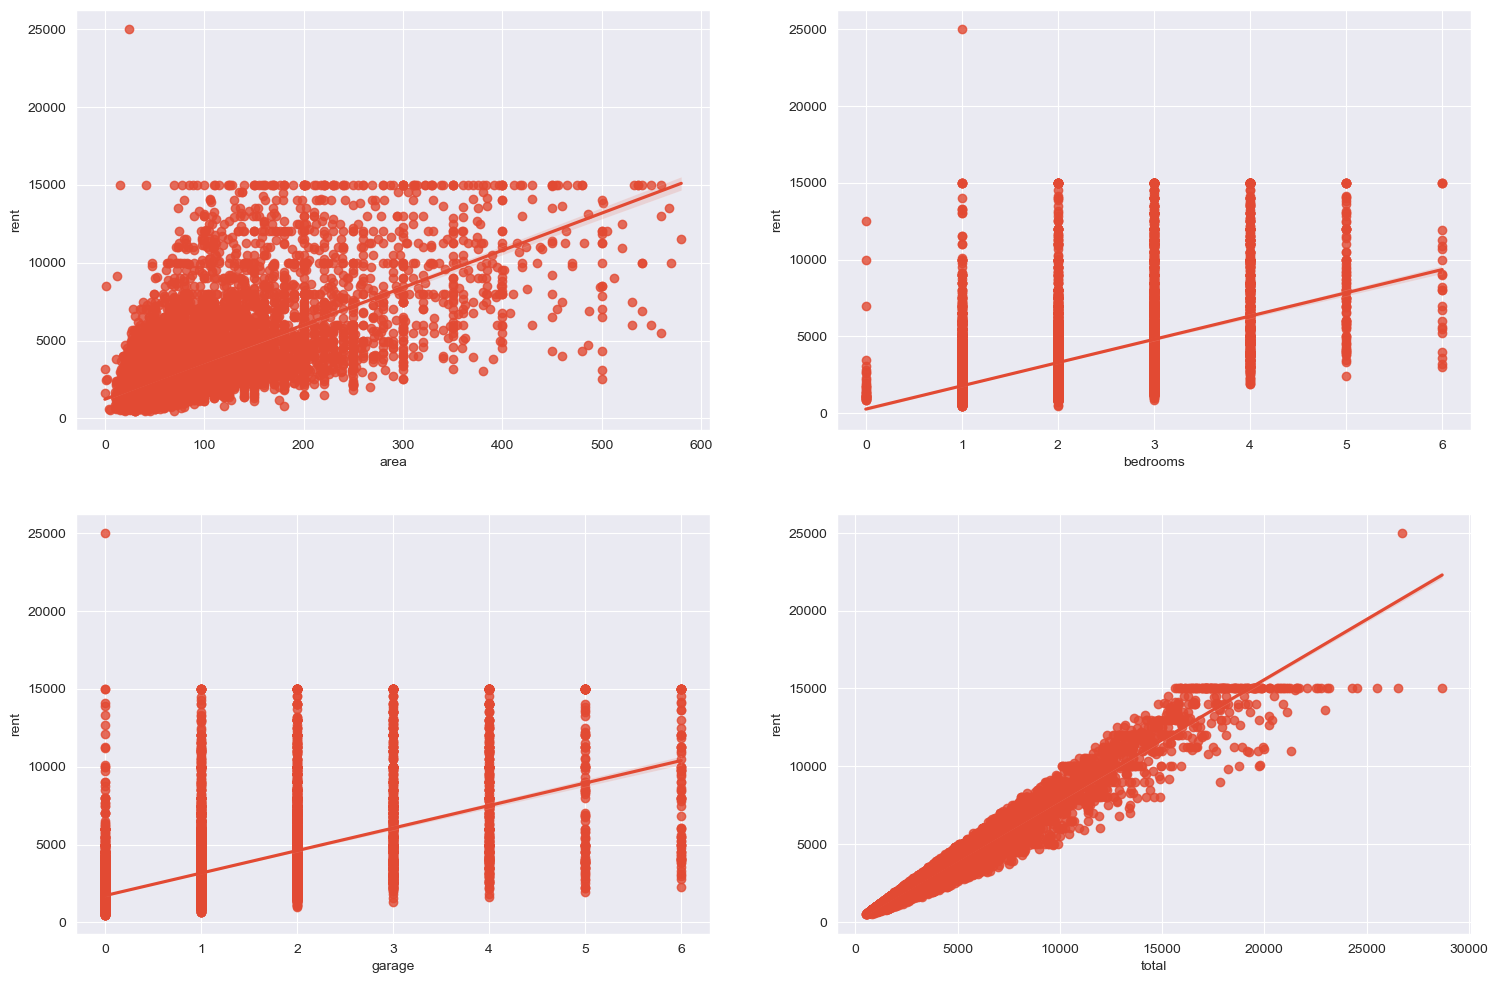

In [98]:
sns.set_style("darkgrid")

fig, axs = plt.subplots( 2, 2, figsize =(18,12))

_= sns.regplot(x="area", y="rent", data= aptos, ax=axs[0,0])
_= sns.regplot(x="bedrooms",y="rent", data= aptos, ax=axs[0,1])
_= sns.regplot(x="garage", y="rent", data= aptos, ax=axs[1,0])
_= sns.regplot(x="total",y="rent", data= aptos, ax=axs[1,1])

